In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('../data/df_subvar.csv')

In [3]:
df = df.loc[(df['WhiteElo'] >= 2500) | (df['WhiteElo'].isna())]
df = df.loc[(df['BlackElo'] >= 2500) | (df['BlackElo'].isna())]

In [4]:
df_aux = df.loc[:, ['SubVariation', 'Result']].groupby(
    by=['SubVariation', 'Result']).agg('Result').count().to_frame()
df_aux.rename(columns={'Result': 'Count'}, inplace=True)
df_aux.reset_index(inplace=True)

b_win = df_aux[df_aux['Result'] == '0-1']
w_win = df_aux[df_aux['Result'] == '1-0']
draw = df_aux[df_aux['Result'] == '1/2-1/2']

results = {}
p_results = []
for v in df_aux['SubVariation'].unique().tolist():
    w = w_win.loc[w_win['SubVariation'] == v, 'Count'].tolist()
    d = draw.loc[draw['SubVariation'] == v, 'Count'].tolist()
    b = b_win.loc[b_win['SubVariation'] == v, 'Count'].tolist()

    if len(w) == 0:
        w = 0
    else:
        w = w[0]

    if len(d) == 0:
        d = 0
    else:
        d = d[0]

    if len(b) == 0:
        b = 0
    else:
        b = b[0]

    total = w+d+b

    row = {}

    row['SubVariation'] = v
    row['Games'] = total
    row['Results'] = tuple([w/total*100,d/total*100,b/total*100])
    results[v] = [w/total*100,d/total*100,b/total*100]

    p_results.append(row)

df_results = pd.DataFrame(p_results)


In [5]:
df_results

,SubVariation,Games,Results
0,9. Bc2 dxe4,1,"(0.0, 0.0, 100.0)"
1,9. d3 Bb7,2,"(50.0, 0.0, 50.0)"
2,9. d3 Bg4,11,"(45.45454545454545, 36.36363636363637, 18.1818..."
3,9. d3 Qd6,1,"(0.0, 100.0, 0.0)"
4,9. d3 d4,2,"(50.0, 50.0, 0.0)"
5,9. d3 dxe4,20,"(20.0, 55.00000000000001, 25.0)"
6,9. d3 h6,1,"(100.0, 0.0, 0.0)"
7,9. d4 Bg4,2,"(100.0, 0.0, 0.0)"
8,9. d4 Nxe4,13,"(53.84615384615385, 23.076923076923077, 23.076..."
9,9. d4 dxe4,20,"(15.0, 70.0, 15.0)"


In [6]:
print(df['SubVariation'].unique().tolist())

['9. exd5 Nxd5', '9. exd5 e4', '9. d3 Qd6', '9. d3 dxe4', '9. d4 Nxe4', '9. d3 d4', '9. d4 exd4', '9. d4 dxe4', '9. d4 Bg4', '9. d3 Bg4', '9. d3 Bb7', '9. Bc2 dxe4', '9. d3 h6', '9. h3 dxe4']


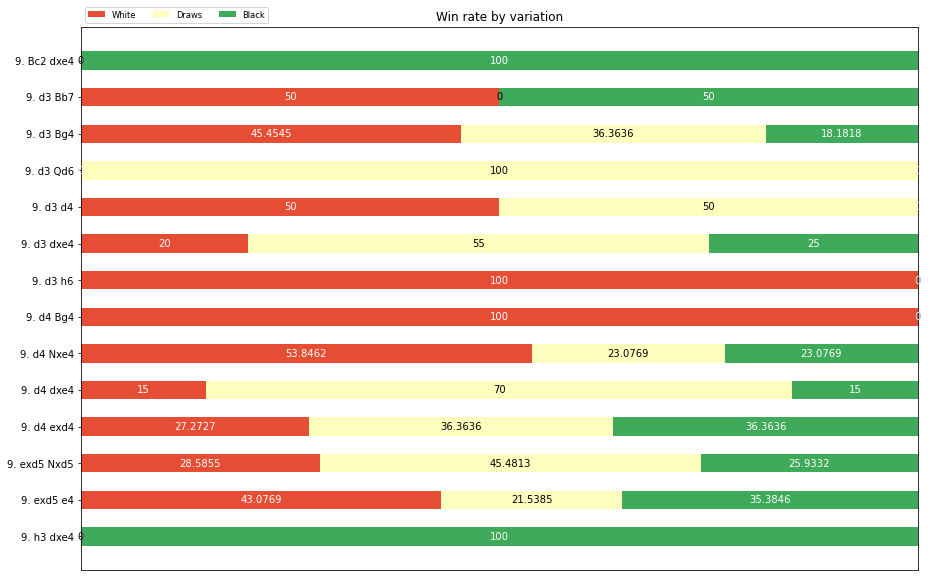

In [7]:
category_names = ['White', 'Draws', 'Black']

def survey(results, category_names):
    """
    Parameters
    ----------
    results : dict
        A mapping from question labels to a list of answers per category.
        It is assumed all lists contain the same number of entries and that
        it matches the length of *category_names*.
    category_names : list of str
        The category labels.
    """
    labels = list(results.keys())
    data = np.array(list(results.values()))
    data_cum = data.cumsum(axis=1)
    category_colors = plt.colormaps['RdYlGn'](
        np.linspace(0.15, 0.85, data.shape[1]))

    fig, ax = plt.subplots(figsize=(15, 10))
    ax.invert_yaxis()
    ax.xaxis.set_visible(False)
    ax.set_xlim(0, np.sum(data, axis=1).max())
    ax.set_title('Win rate by variation')

    for i, (colname, color) in enumerate(zip(category_names, category_colors)):
        widths = data[:, i]
        starts = data_cum[:, i] - widths
        rects = ax.barh(labels, widths, left=starts, height=0.5,
                        label=colname, color=color)

        r, g, b, _ = color
        text_color = 'white' if r * g * b < 0.5 else 'black'
        ax.bar_label(rects, label_type='center', color=text_color)
        
    ax.legend(ncol=len(category_names), bbox_to_anchor=(0, 1),
              loc='lower left', fontsize='small')

    return fig, ax


survey(results, category_names)
plt.show()
